# Model Selection

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.experimental import (
    enable_iterative_imputer,
)
from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.ensemble import (
    RandomForestClassifier,
)

# url = (
#     "http://biostat.mc.vanderbilt.edu/"
#     "wiki/pub/Main/DataSets/titanic3.xls"
# )
df = pd.read_excel("titanic3.xls")
def tweak_titanic(df):
    df = df.drop(
        columns=[
            "name",
            "ticket",
            "home.dest",
            "boat",
            "body",
            "cabin",
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

def get_train_test_X_y(
    df, y_col, size=0.3, std_cols=None
):
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=size, random_state=42
    )
    cols = X.columns
    num_cols = [
        "pclass",
        "age",
        "sibsp",
        "parch",
        "fare",
    ]
    fi = impute.IterativeImputer()

    fitted = fi.fit_transform(X_train[num_cols])
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
    test_fit = fi.transform(X_test[num_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
    if std_cols:
        std = preprocessing.StandardScaler()
        fitted = std.fit_transform(X_train[std_cols])
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

ti_df = tweak_titanic(df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "survived", std_cols=std_cols
)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

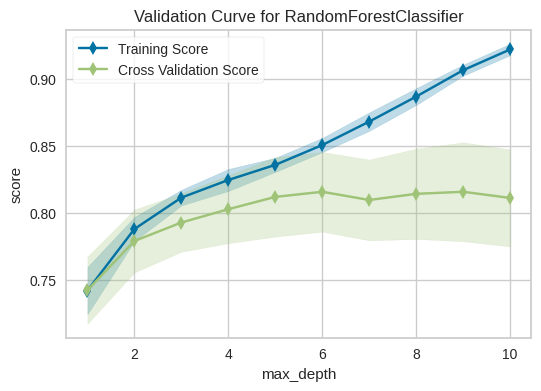

In [2]:
from yellowbrick.model_selection import (
    ValidationCurve,
)
fig, ax = plt.subplots(figsize=(6, 4))
vc_viz = ValidationCurve(
    RandomForestClassifier(n_estimators=100),
    param_name="max_depth",
    param_range=np.arange(1, 11),
    cv=10,
    n_jobs=-1,
)
vc_viz.fit(X, y)
vc_viz.poof();
#fig.savefig("images/mlpr_1101.png", dpi=300)

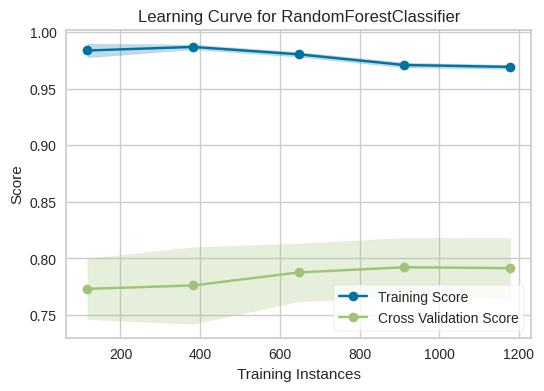

In [3]:
from yellowbrick.model_selection import (
    LearningCurve,
)
fig, ax = plt.subplots(figsize=(6, 4))
lc3_viz = LearningCurve(
    RandomForestClassifier(n_estimators=100),
    cv=10,
)
lc3_viz.fit(X, y)
lc3_viz.poof();
#fig.savefig("images/mlpr_1102.png", dpi=300)